# Performing an unbinned analysis

**In this tutorial you will learn to fit a parametric model to the event data (unbinned fit) and how to inspect the fit residuals**

Now you are ready to fit the models for the source and the background to the data.

We start by importing gammalib, ctools, and cscripts.

In [1]:
import gammalib
import ctools
import cscripts

We will also use matplotlib to display the results.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

Finally we add to our path the directory containing the example plotting scripts provided with the ctools installation.

In [3]:
import sys
import os
sys.path.append(os.environ['CTOOLS']+'/share/examples/python/')

## Preparing the model

First, we will merge the two models we derived in the previous tutorials for source and background.

In [4]:
srcmodel = 'crab.xml'
bkgmodel = 'bkgmodel.xml'

models = gammalib.GModels()
for inmodels in [srcmodel,bkgmodel]:
    for model in gammalib.GModels(inmodels):
        models.append(model)
        
print(models)

=== GModels ===
 Number of models ..........: 5
 Number of parameters ......: 86
=== GModelSky ===
 Name ......................: Src001
 Instruments ...............: all
 Instrument scale factors ..: unity
 Observation identifiers ...: all
 Model type ................: PointSource
 Model components ..........: "PointSource" * "PowerLaw" * "Constant"
 Number of parameters ......: 6
 Number of spatial par's ...: 2
  RA .......................: 83.6192131308071 +/- 0 deg (free,scale=1)
  DEC ......................: 22.0199996472185 +/- 0 deg (free,scale=1)
 Number of spectral par's ..: 3
  Prefactor ................: 5.7e-18 +/- 0 [0,infty[ ph/cm2/s/MeV (free,scale=5.7e-18,gradient)
  Index ....................: -2.48 +/- 0 [10,-10]  (free,scale=-2.48,gradient)
  PivotEnergy ..............: 300000 MeV (fixed,scale=300000,gradient)
 Number of temporal par's ..: 1
  Normalization ............: 1 (relative value) (fixed,scale=1,gradient)
=== GCTAModelBackground ===
 Name ....................

Note how the source found by cssrcdetect was named *Src001*. We will call it *Crab* instead. Also, spectral parameters are set to default values, but you should make sure they are appropriate so that the model fit runs seamlessly. In this case it is best to set the value of the pivot energy for the Crab within our energy range (> 0.66 TeV). We will set it to 1 TeV.

In [5]:
models['Src001'].name('Crab')
models['Crab']['PivotEnergy'].value(1.e6)

We will save this model to disk for later use.

In [6]:
modelfile = 'crab_models.xml'
models.save(modelfile)

## Fitting the model to the data

The model fit is performed by ctlike. We will use the previously selected events.

In [7]:
obsfile = "obs_crab_selected.xml"

like = ctools.ctlike()
like['inobs'] = obsfile
like['inmodel'] = modelfile

like.run()

We can now look at the results from the optimisation and the fitted model.

In [8]:
print(like.opt())
print(like.obs().models()['Crab'])

=== GOptimizerLM ===
 Optimized function value ..: 98200.140
 Absolute precision ........: 0.005
 Acceptable value decrease .: 2
 Optimization status .......: converged
 Number of parameters ......: 86
 Number of free parameters .: 48
 Number of iterations ......: 28
 Lambda ....................: 0.1
=== GModelSky ===
 Name ......................: Crab
 Instruments ...............: all
 Instrument scale factors ..: unity
 Observation identifiers ...: all
 Model type ................: PointSource
 Model components ..........: "PointSource" * "PowerLaw" * "Constant"
 Number of parameters ......: 6
 Number of spatial par's ...: 2
  RA .......................: 83.6230529061662 +/- 0.00239926887672786 deg (free,scale=1)
  DEC ......................: 22.0247811570052 +/- 0.00218925167816472 deg (free,scale=1)
 Number of spectral par's ..: 3
  Prefactor ................: 4.8925181519509e-17 +/- 2.67898412185662e-18 [0,infty[ ph/cm2/s/MeV (free,scale=5.7e-18,gradient)
  Index .................

The statistical 1-sigma positional uncertainty corresponds to 0.12 arcmin. Systematic uncertainties are not computed. The fitted position can be compared to the values of 83.629±0.005 degrees in Right Ascension and 22.012±0.001 degrees in Declination reported in [Holler et al. (2017)](https://arxiv.org/pdf/1707.04196.pdf).

According to [SIMBAD](http://cdsportal.u-strasbg.fr/?target=Crab%20nebula), the Crab nebula is situated at a Right Ascension of 83.633 degrees and a Declination of 22.015 degrees, which is 0.013 degrees (0.82 arcmin) away from the fitted position.

The intensity at 1 TeV of the Crab was fitted to (4.89±0.27)×10−11 photons cm−2 s−1 TeV−1 the spectral index of the power law is −2.70±0.07. This can be compared to the values of (3.45±0.05)×10−11 photons cm−2 s−1 TeV−1 and −2.63±0.01 reported in [Aharonian et al. (2006), A&A, 457, 899](https://www.aanda.org/articles/aa/abs/2006/39/aa5351-06/aa5351-06.html) (note that the datasets, calibrations etc. used in our analysis are not the same as in that paper).

In the ctlike run above the energy dispersion, which relates the true photon energies to the energies of the reconstructed events, was not taken into account. By default **energy dispersion usage is disabled** since it involves an extra dimension in the data analysis which slows down the computations. We can run accounting for energy dispersion to compare the results.

In [9]:
like['edisp'] = True

like.run()

In [10]:
print(like.opt())
print(like.obs().models()['Crab'])

=== GOptimizerLM ===
 Optimized function value ..: 98201.032
 Absolute precision ........: 0.005
 Acceptable value decrease .: 2
 Optimization status .......: converged
 Number of parameters ......: 86
 Number of free parameters .: 48
 Number of iterations ......: 3
 Lambda ....................: 1e-06
=== GModelSky ===
 Name ......................: Crab
 Instruments ...............: all
 Instrument scale factors ..: unity
 Observation identifiers ...: all
 Model type ................: PointSource
 Model components ..........: "PointSource" * "PowerLaw" * "Constant"
 Number of parameters ......: 6
 Number of spatial par's ...: 2
  RA .......................: 83.6217041522328 +/- 0.00261598773627659 deg (free,scale=1)
  DEC ......................: 22.0245022862116 +/- 0.00239693484099142 deg (free,scale=1)
 Number of spectral par's ..: 3
  Prefactor ................: 4.64521936275237e-17 +/- 2.43165266024221e-18 [0,infty[ ph/cm2/s/MeV (free,scale=5.7e-18,gradient)
  Index ...............

You can verify that the results are broadly consistents with those obtained ignoring the energy dispersion.

## Inspecting the fit residuals

Following a model fit, you should always inspect the fit residuals. First let’s inspect the spectral residuals. You can do this using the csresspec script.

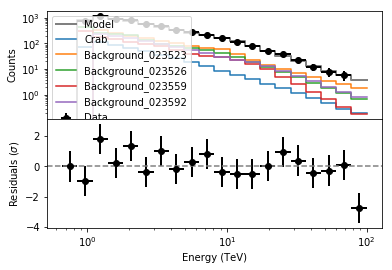

In [11]:
residuals = 'residuals.fits'

resspec = cscripts.csresspec(like.obs())
resspec['stack']       = True
resspec['components']  = True
resspec['ebinalg']     = 'LOG'
resspec['emin']        = 0.66
resspec['emax']        = 100.
resspec['enumbins']    = 20
resspec['proj']        = 'CAR'
resspec['coordsys']    = 'CEL'
resspec['xref']        = 83.63
resspec['yref']        = 22.01
resspec['binsz']       = 0.02
resspec['nxpix']       = 200
resspec['nypix']       = 200
resspec['algorithm']   = 'SIGNIFICANCE'
resspec['outfile']     = residuals

resspec.execute()

from show_residuals import plot_residuals
plot_residuals(residuals,'',0)

The spectral fit looks satisfactory. Finally you should also inspect the spatial residuals. You do this using the csresmap script.

In [12]:
resmap = cscripts.csresmap(like.obs())
resmap['emin']        = 0.66
resmap['emax']        = 100.
resmap['proj']        = 'CAR'
resmap['coordsys']    = 'CEL'
resmap['xref']        = 83.63
resmap['yref']        = 22.01
resmap['binsz']       = 0.02
resmap['nxpix']       = 200
resmap['nypix']       = 200
resmap['algorithm']   = 'SUBDIV'

resmap.run()

We will inspect the residual map with a slight smoothing to suppress statistical fluctuations.

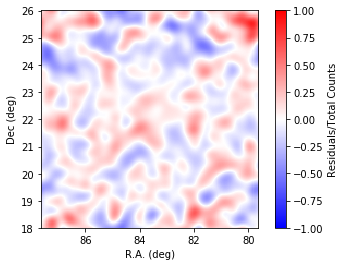

In [13]:
resmap._resmap.smooth('GAUSSIAN',0.1)

ax  = plt.subplot()
plt.imshow(resmap._resmap.array(),origin='lower',
            cmap='bwr',vmin=-1,vmax=1,
            extent=[83.63+0.02*200,83.63-0.02*200,22.01-0.02*200,22.01+0.02*200])
            # Boundaries of the coord grid
ax.set_xlabel('R.A. (deg)')
ax.set_ylabel('Dec (deg)')
cbar = plt.colorbar()
cbar.set_label('Residuals/Total Counts')

The residuals look flat across the field analysed.